In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import statistics
import seaborn as sns 
from scipy import stats                        

In [9]:
# Nhập dữ liệu

data = pd.read_csv("Inc_Exp_Data.csv")
data.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1
5,14000,8000,2,0,196560,Graduate,1
6,15000,16000,3,35000,167400,Post-Graduate,1
7,18000,20000,5,8000,216000,Graduate,1
8,19000,9000,2,0,218880,Under-Graduate,1
9,20000,9000,4,0,220800,Under-Graduate,2


In [10]:
# Xem thông tin dữ liệu trong df

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


# Task 1: The Distribution

In [11]:
Type = []
for x in data['Mthly_HH_Income']:
    if x <= 20000:
        Type.append('Low')
    elif 20000 < x <= 50000:
        Type.append('Medium')
    elif 50000 < x <= 80000:
        Type.append('High')
    else:
        Type.append('Huge')

data.insert(7, "Type_Income", Type)
data.head(10)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income
0,5000,8000,3,2000,64200,Under-Graduate,1,Low
1,6000,7000,2,3000,79920,Illiterate,1,Low
2,10000,4500,2,0,112800,Under-Graduate,1,Low
3,10000,2000,1,0,97200,Illiterate,1,Low
4,12500,12000,2,3000,147000,Graduate,1,Low
5,14000,8000,2,0,196560,Graduate,1,Low
6,15000,16000,3,35000,167400,Post-Graduate,1,Low
7,18000,20000,5,8000,216000,Graduate,1,Low
8,19000,9000,2,0,218880,Under-Graduate,1,Low
9,20000,9000,4,0,220800,Under-Graduate,2,Low


In [12]:
# Bảng thống kê phần trăm thu nhập với
# Huge >= 80000$ , High >= 50000$ , Medium >= 20000$, Low < 20000$

x = data.groupby('Type_Income')['Type_Income'].count()
x = pd.DataFrame(x)
x.columns = ['Percent']
type_inc = x/sum(x['Percent'])*100
type_inc

,Percent
Type_Income,
High,14.0
Huge,12.0
Low,22.0
Medium,52.0


Text(0, 0.5, 'Percent')

<Figure size 576x576 with 0 Axes>

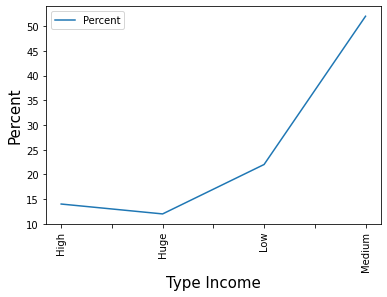

In [13]:
plt.figure(figsize=(8, 8))
type_inc.plot()
plt.xticks(rotation =90, fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Type Income', fontsize=15)
plt.ylabel('Percent', fontsize=15)


In [14]:
# Bảng thống kê phần trăm nộp thuế

x = data.groupby('Emi_or_Rent_Amt')['Emi_or_Rent_Amt'].count()
x = pd.DataFrame(x)
x.columns = ['Percent']
x.index.names = ['Count']
amt = x/sum(x['Percent'])*100
amt

,Percent
Count,
0,60.0
1000,2.0
2000,4.0
2500,2.0
3000,4.0
3500,6.0
4000,2.0
5000,4.0
8000,4.0


Text(0, 0.5, 'Percent')

<Figure size 576x576 with 0 Axes>

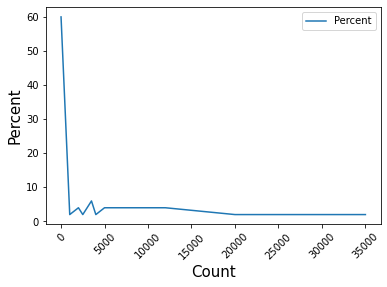

In [15]:
plt.figure(figsize=(8, 8))
amt.plot()
plt.xticks(rotation =45, fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Percent', fontsize=15)

In [16]:
# Bảng thống kê phần trăm trình độ học vấn cao nhất

x = data.groupby('Highest_Qualified_Member')['Highest_Qualified_Member'].count()
x = pd.DataFrame(x)
x.columns = ['Percent']
highest_qm = x/sum(x['Percent'])*100
highest_qm


,Percent
Highest_Qualified_Member,
Graduate,38.0
Illiterate,10.0
Post-Graduate,12.0
Professional,20.0
Under-Graduate,20.0


Text(0, 0.5, 'Percent')

<Figure size 576x576 with 0 Axes>

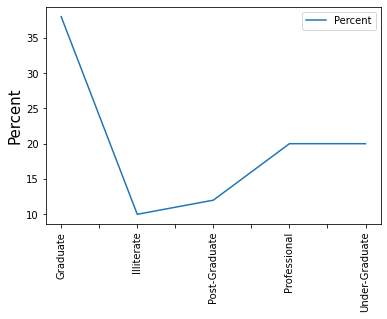

In [17]:
plt.figure(figsize=(8, 8))
highest_qm.plot()
plt.xticks(rotation =90, fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('', fontsize=15)
plt.ylabel('Percent', fontsize=15)

# Task 2: The Central Tendency

In [20]:
# Tính trung bình các cột 

print("Giá trị trung bình của dataset:")
pd.DataFrame(data.mean()).T

Giá trị trung bình của dataset:


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
0,41558.0,18818.0,4.06,3060.0,490019.04,1.46


In [19]:
# Tính trung vị 

print("Trung vị của dataset:")
pd.DataFrame(data.median()).T   

Trung vị của dataset:


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
0,35000.0,15500.0,4.0,0.0,447420.0,1.0


In [13]:
# Tìm mode

print("Yếu vị của dataset:")
data.mode(dropna = True)

Yếu vị của dataset:


,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income
0,45000,25000,4,0,590400,Graduate,1,Medium


# Task 3: Dispersion

In [21]:
min_value = data.min(skipna= True, numeric_only= True)
print(min_value)
print('-'*50)

Mthly_HH_Income           5000
Mthly_HH_Expense          2000
No_of_Fly_Members            1
Emi_or_Rent_Amt              0
Annual_HH_Income         64200
No_of_Earning_Members        1
dtype: int64
--------------------------------------------------


In [22]:
max_value = data.max(skipna= True, numeric_only= True)
print(max_value)
print('-'*50)

Mthly_HH_Income           100000
Mthly_HH_Expense           50000
No_of_Fly_Members              7
Emi_or_Rent_Amt            35000
Annual_HH_Income         1404000
No_of_Earning_Members          4
dtype: int64
--------------------------------------------------


In [24]:
print('Phạm vi của dữ liệu:')
print(max_value - min_value)
print('-'*50)

Phạm vi của dữ liệu:
Mthly_HH_Income            95000
Mthly_HH_Expense           48000
No_of_Fly_Members              6
Emi_or_Rent_Amt            35000
Annual_HH_Income         1339800
No_of_Earning_Members          3
dtype: int64
--------------------------------------------------


In [25]:
# Tính độ lệch chuẩn - standard deviation
print("Độ lệch chuẩn của dataset:")
data.std(skipna = True)

Độ lệch chuẩn của dataset:


Mthly_HH_Income           26097.908979
Mthly_HH_Expense          12090.216824
No_of_Fly_Members             1.517382
Emi_or_Rent_Amt            6241.434948
Annual_HH_Income         320135.792123
No_of_Earning_Members         0.734291
dtype: float64

In [16]:
# Bảng biểu diễn sự phụ thuộc lẫn nhau của các cột

data_mx = data.corr(method = "pearson")
data_mx

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


<AxesSubplot:>

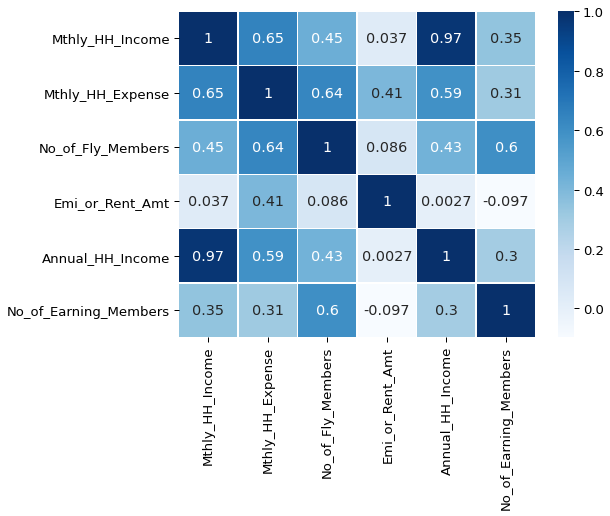

In [17]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.5)

sns.heatmap(data_mx, annot=True, cmap='Blues', linewidths=0.5, linecolor='white')

In [18]:
# Sử dụng hàm describe để thống kê đơn giản dữ liệu

data.describe()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
count,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,41558.000000,18818.000000,4.060000,3060.000000,4.900190e+05,1.460000
std,26097.908979,12090.216824,1.517382,6241.434948,3.201358e+05,0.734291
min,5000.000000,2000.000000,1.000000,0.000000,6.420000e+04,1.000000
25%,23550.000000,10000.000000,3.000000,0.000000,2.587500e+05,1.000000
50%,35000.000000,15500.000000,4.000000,0.000000,4.474200e+05,1.000000
75%,50375.000000,25000.000000,5.000000,3500.000000,5.947200e+05,2.000000
max,100000.000000,50000.000000,7.000000,35000.000000,1.404000e+06,4.000000


Text(0, 0.5, 'Count')

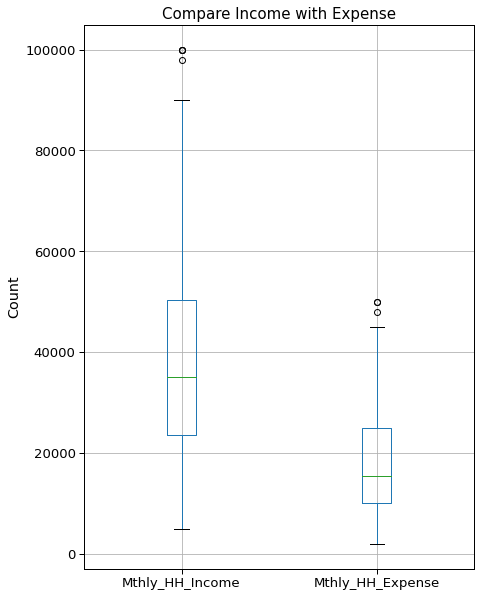

In [19]:
# Tương quan giữa thu nhập và chi tiêu hàng tháng


plt.figure(figsize=(7, 10))
plt.title('Compare Income with Expense', fontsize=15)
data[['Mthly_HH_Income', 'Mthly_HH_Expense']].boxplot()
plt.ylabel('Count')


Text(0, 0.5, 'Count')

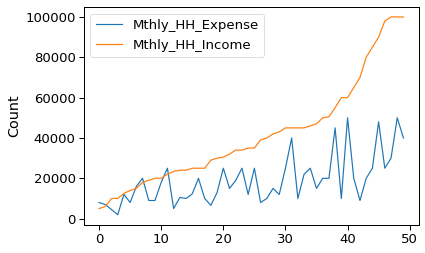

In [20]:
data[["Mthly_HH_Expense", "Mthly_HH_Income"]].plot()
plt.ylabel('Count')

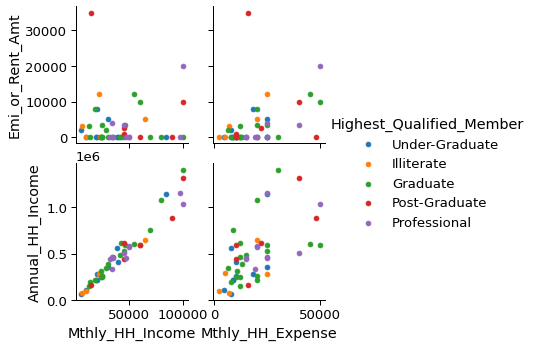

In [21]:
data_g = sns.PairGrid(data, hue='Highest_Qualified_Member',
x_vars=['Mthly_HH_Income', 'Mthly_HH_Expense'],
y_vars=['Emi_or_Rent_Amt', 'Annual_HH_Income'])
data_g.map(plt.scatter)
data_g.add_legend()

In [22]:
# Nhóm dữ liệu 

df_sort = data.sort_values(by= [data.columns[5], data.columns[4]], ascending= False)
df_sort

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Type_Income
44,85000,25000,5,0,1142400,Under-Graduate,2,Huge
26,39000,8000,4,0,556920,Under-Graduate,1,Medium
27,40000,10000,4,0,412800,Under-Graduate,1,Medium
20,30500,25000,5,5000,351360,Under-Graduate,1,Medium
10,20000,18000,4,8000,278400,Under-Graduate,2,Low
17,25000,10000,6,0,258000,Under-Graduate,3,Medium
9,20000,9000,4,0,220800,Under-Graduate,2,Low
8,19000,9000,2,0,218880,Under-Graduate,1,Low
2,10000,4500,2,0,112800,Under-Graduate,1,Low
0,5000,8000,3,2000,64200,Under-Graduate,1,Low
